# Chapter 3 - Unsupervised Learning and Preprocessing
비지도 학습과 데이터 전처리

<br></br>
## 1 비지도 학습
답이 정해지지 않은 문제를 풀어야 하는 특성상, <strong>알고리즘이 유용성 평가</strong>가 어려운 과제이다.

때문에 <strong>분석가가 직접 눈으로 평가</strong>하는 방법이 유일한 경우가 많아서, <strong>탐색적 분석 단계</strong>에서 가장 많이 사용한다
1. 데이터의 <strong>비지도 변환</strong> (transformation) : <strong>해석하기 쉽게 변환</strong>하는 알고리즘 ex)차원축소
2. 데이터의 <strong>비지도 군집</strong> (clustering) : 데이터 <strong>구성단위나 성분</strong>을 찾는다 ex)텍스트에서 문서의 주제 추출

<br></br>
## 2 데이터 전처리와 스케일의 조정
비지도 학습(ex)SVM과 유사) 알고리즘은 <strong>스케일에 민감</strong>하다

데이터 특성값의 조정을 통해서 데이터를 변경한다
### 01 <strong>데이터의 전처리</strong>

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family='NanumGothic')

import numpy as np
from data import mglearn

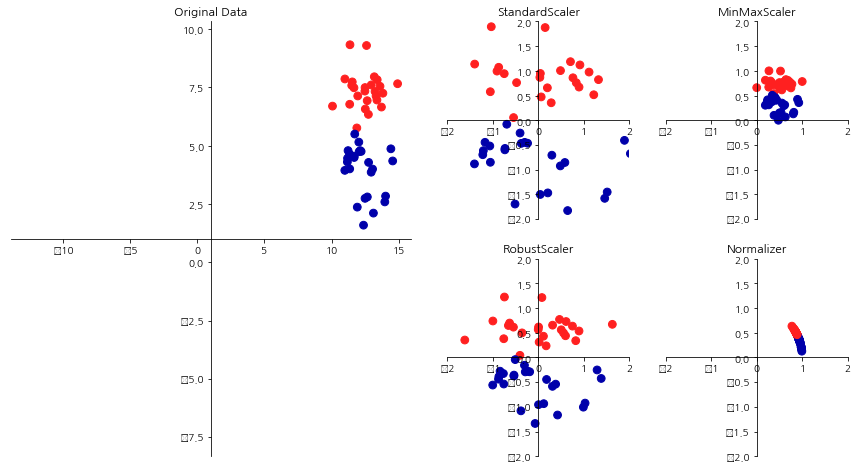

In [2]:
mglearn.plots.plot_scaling()

In [3]:
# 다양한 정규화 모델 결과해석
# 정규화는 특성벡터의 길이와는 무관하고, 데이터의 방향(각도)만 중요할 때 많이 사용한다
# 1.StandardScaler : 특성을 평균 0, 분산 1로 변경하나, 최대/최소값을 제한하지 않는다
# 2.RobustScaler : StandardScaler 비슷하나, 평균/분산 대신, 중간/사분위 값을 사용하여 이상치 영향을 최소화 한다
# 3.MinMaxScaler : 모든 특성이 0과 1 사이에 위치하도록 데이터를 변경한다
# 4.Normalizer : 특성 벡터의 '유클리디안 길이'가 1이 되도록 데이터를 조정한다 (데이터 분포 구(Sphere) 지금이 1인 원(circle)을 투영한다.)

### 02 데이터 변환 적용하기
MinMaxScaler()를 활용한 유방암 데이터 전처리 (총 30개의 컬럼으로 구성된 데이터를 분석)

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [62]:
# Train 데이터 스케일 조정
print("변환 전 데이터 크기(data shape)        : {}".format(X_train.shape))
print("스케일 조정 전 필드별 최소값 (per-feature minimum before scaling) :\n {}".format(X_train.min(axis=0)))
print("스케일 조정 전 필드별 최대값 (per-feature maximum before scaling) :\n {}".format(X_train.max(axis=0)))

변환 전 데이터 크기(data shape)        : (1547, 5655)
스케일 조정 전 필드별 최소값 (per-feature minimum before scaling) :
 [ 0.  0.  0. ...,  0.  0.  0.]
스케일 조정 전 필드별 최대값 (per-feature maximum before scaling) :
 [ 0.99346405  0.99346405  0.99346405 ...,  1.          1.          1.        ]


In [63]:
# 최대/ 최솟값 스케일 조절을 사용한다
# 스케일 조절시 X_train 만 넘겨주고, y_train은 적용하지 않는다(불필요 하므로)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)                        # 최대/최소 알고지름으로 데이터를 변환
X_train_scaled = scaler.transform(X_train) # 변환한 데이터를 별도 객체로 출력

print("변환 후 데이터 크기(transformed shape) : {}".format(X_train_scaled.shape))
print("스케일 조정 후 필드별 최소값 (per-feature minimum after scaling) :\n {}".format(
    X_train_scaled.min(axis=0)))
print("스케일 조정 후 필드별 최대값 (per-feature maximum after scaling) :\n {}".format(
    X_train_scaled.max(axis=0)))

변환 후 데이터 크기(transformed shape) : (1547, 5655)
스케일 조정 후 필드별 최소값 (per-feature minimum after scaling) :
 [ 0.  0.  0. ...,  0.  0.  0.]
스케일 조정 후 필드별 최대값 (per-feature maximum after scaling) :
 [ 1.  1.  1. ...,  1.  1.  1.]


In [6]:
# Test 데이터 스케일 조정

X_test_scaled = scaler.transform(X_test)
print("스케일 조절 후 필드별 최소값 (per-feature minimum after scaling) :\n{}".format(X_test_scaled.min(axis=0)))
print("스케일 조절 후 필드별 최대값 (per-feature maximum after scaling) :\n{}".format(X_test_scaled.max(axis=0)))

# 모델해석
# 1. Train 데이터는 0과 1 사이의 값으로 데이터가 변환 되었다
# 2. Train의 최대/최소값만 기준이 되어서, Test 데이터는 1을 벗어나고 '-' 값으로도 출력된다
# 이를 극복하기 위한 방법을 알아보자

스케일 조절 후 필드별 최소값 (per-feature minimum after scaling) :
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조절 전 필드별 최대값 (per-feature maximum after scaling) :
[ 0.9578778   0.81501522  0.95577362  0.89353128  0.81132075  1.21958701
  0.87956888  0.9333996   0.93232323  1.0371347   0.42669616  0.49765736
  0.44117231  0.28371044  0.48703131  0.73863671  0.76717172  0.62928585
  1.33685792  0.39057253  0.89612238  0.79317697  0.84859804  0.74488793
  0.9154725   1.13188961  1.07008547  0.92371134  1.20532319  1.63068851]


### 03 훈련 데이터와 테스트 데이터의 스케일을 같은 기준으로 조정
Train과 Test 에 같은 기준을 적용하는 방법을 찾아보자

In [8]:
# Test 데이터를 기준으로 전처리
from sklearn.datasets import make_blobs

# 인위적 데이터 생성, Train/ Test 데이터 나누기
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

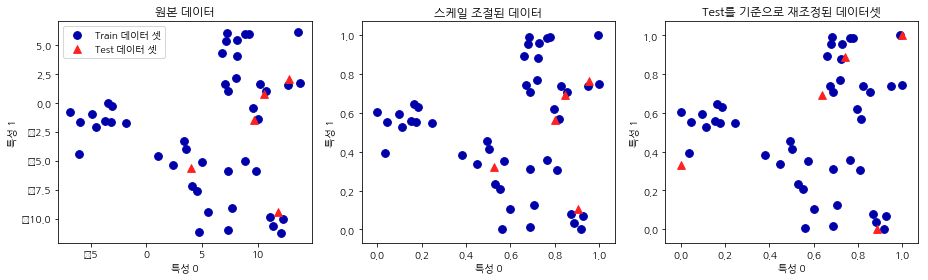

In [9]:
# Train/ Test 산점도 그리기
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Train 데이터 셋", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test 데이터 셋", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler()로 스케일을 조절
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일 조절된 데이터를 산점도로 그린다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("스케일 조절된 데이터")

# Test 데이터 셋을 기준으로 조절하나, 이는 실전에선 사용해선 안됩니다!!!!
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# Test를 기준으로 재 조정한 데이터셋
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Test를 기준으로 재조정된 데이터셋")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

In [10]:
# 3번째 그래프는 빨간 Test를 기준으로 데이터가 재정렬 되어, Test 배치가 2번쨰와 많이 차이가 난다
# 모든 전처리 모듈이 .fit, .transform 메서드를 제공한다

In [11]:
# 표준화 모듈을 사용하여 전처리 작업을 한다
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 연속적인 메서드 적용
# 전처리로 작업내용이 제한된 만큼 이 경우에는 효과적으로 사용가능하다
X_scaled = scaler.fit(X_train).transform(X_train)
X_scaled_d = scaler.fit_transform(X_train)

### 04 <strong>지도학습</strong>에서 데이터 전처리
유방암 데이터셋 <strong>SVC 분석시 전처리 효과 비교</strong>

In [12]:
# 유방암 원본 데이터 SVC 분류학습 성능평가
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test 데이터 셋의 accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test 데이터 셋의 accuracy: 0.63


In [13]:
# 전처리 1 : MinMaxScaler() (0 ~ 1)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 전처리 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)
print("스케일 조정 후 Test 데이터 셋의 accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

스케일 조정 후 Test 데이터 셋의 accuracy: 0.97


In [14]:
# 전처리 2 : StandardScaler() (평균 0, 분산 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 전처리 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)
print("SVM test 데이터 셋의 accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test 데이터 셋의 accuracy: 0.96


In [15]:
# 결과정리
# 데이터 전처리 만으로도 학습률을 결과가 높아진다
# 학습모듈과 연관성을 위해서도 sklearn의 모듈로 전처리함을 추천한다

<br></br>
## <strong>3 차원의 축소, 데이터 특성 추출, 매니폴드 학습</strong>
시각화를 위한 데이터 압축, 추가적 처리를 위해 특징적 feacture의 추출 을 목적
1. <strong>주성분 분석 PCA</strong> (Principal Component Analysis)
2. <strong>비음수 행렬 분해 NMF</strong> (Non Negative matrix factorization)
3. <strong>t-SNE</strong> (t-distributed stochastic neighbor embadding) : 2차원 산점도를 이용한 시각화 정보 추출용

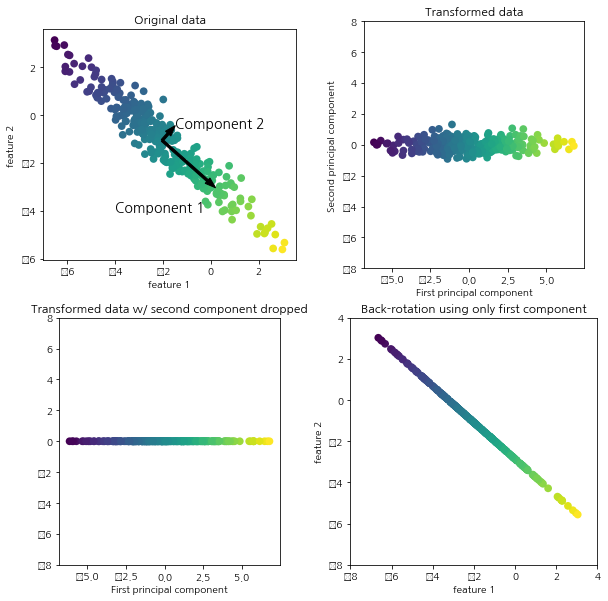

In [16]:
mglearn.plots.plot_pca_illustration()

In [17]:
# 모델의 해석
# 그림 1 Original data 는 원본 데이터 포인트를 색으로 구분하여 표시한 것으로, 주성분은 component 1이 된다
# 그림 2 component 1 과 component 2 를 x축과 y축에 나란하도록 PCA에 의해 회전, 평균을 제외하여 (0,0)에 중심을 위치시킴
# 그림 3 Transformed data w/second component : component 1 추출하여 2차원을 1차원 데이터로 표시한 것이다
# 그림 4 Back-rotation using only first component : 데이터 평균을 더해서 반대로 회전을 되돌린다

### <strong>01 PCA 주성분 분석</strong> : 상관성이 높은 대표필드 추출
PCA 분석을 활용하여 유방암 데이터 셋 (30개의 필드 데이터를 2차원 표 위에 정렬) 시각화 하기

2개 이상의 feature를 갖는 데이터는 산점도로 표시하기가 어렵다

iris의 경우는 4개의 속성을 2개씩 나누어 표현하는 방식으로 가능하지만 30개 이상인 데이터에 적용은 힘들다

<h4> <strong>1) 히스토그램을 활용</strong>한 유방암 데이터 셋 분석 </h4> 
30개의 필드 데이터를 2차원 표 위에 시각화 하기 위해서

Target을 특징으로 나눠서 Histogram을 그리는 방법이다

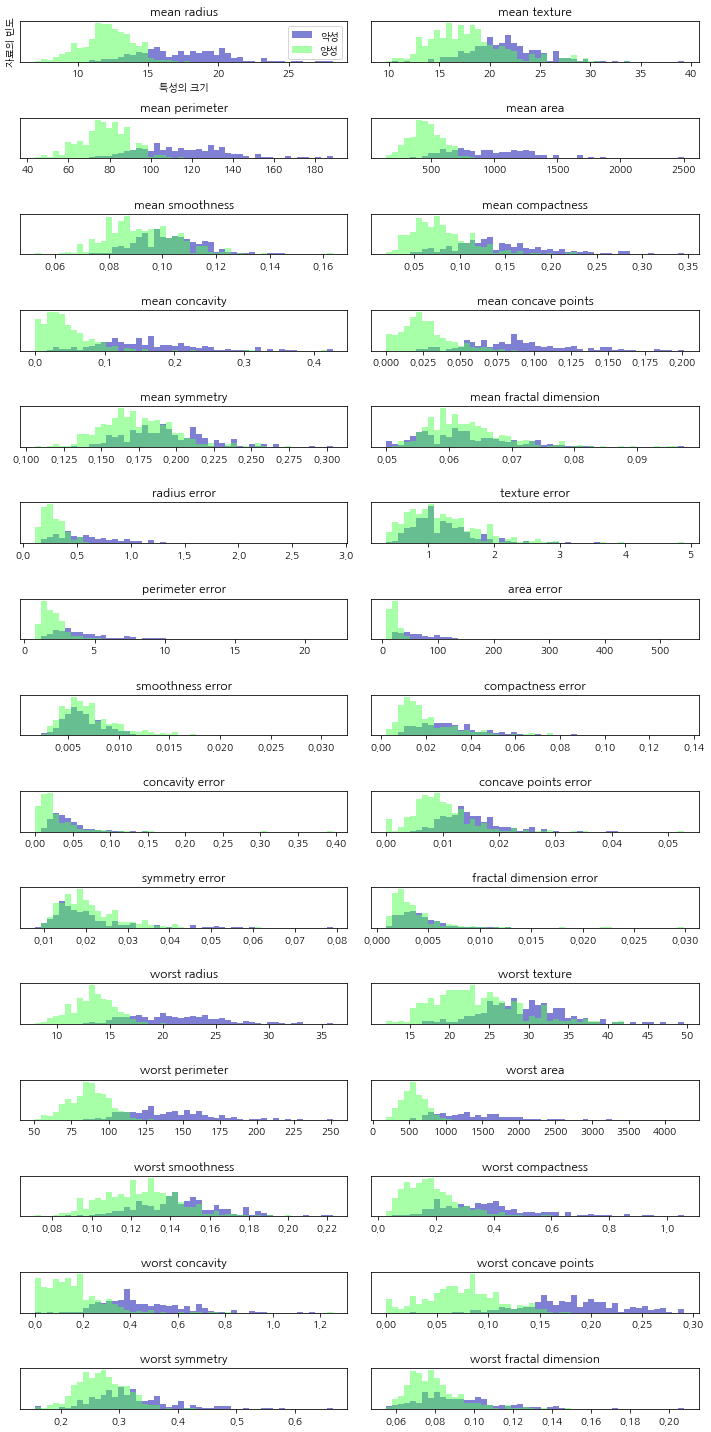

In [18]:
import numpy as np
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign    = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30): # 30개 필드의 히스토그램 순차적 출력
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성의 크기"); ax[0].set_ylabel("자료의 빈도")
ax[0].legend(["악성", "양성"], loc="best"); fig.tight_layout()

In [19]:
# 결과해석
# 각 특성별 '히스토그램'을 출력한 것으로써
# '특정간격'(bin)내에 얼마나 데이터가 분포하는지를 횟수로 계산한 결과이다
# 파란색이 악성, 녹색이 양성으로 각 포인트의 위치를 출력한다
# worst concave points 의 경우, 양성과 음성 분리가 잘 된 분류에 해당한다 (오른쪽 아래서 3번쨰 위 히스토그램)

# 한계
# feacture간의 상호작용이 어떤 관련이 있는지는 전혀 알 수 없다
# PCA 분석을 사용하면 feature간의 상호작용을 알 수 있다

<h4> <strong>2) PCA 분석</strong>을 활용한 유방암 데이터 셋 분석 </h4> 
feature간의 상호작용을 고려한 데이터셋 축약하기

매개변수 : <strong>n_components=</strong> 추출할 주성분 갯수

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#분산이 1이 되도록 데이터 스케일 조절
scaler = StandardScaler()  # 기본 표준화 옵션 적용
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [21]:
# PCA 주성분 분석을 실시한다
from sklearn.decomposition import PCA
pca = PCA(n_components=2)       # 가장 빈도가 높은 2개의 주성분만 유지시킨다 (나머지는 제외)
pca.fit(X_scaled)               # X_scaled 에서 주성분을 찾는다
X_pca = pca.transform(X_scaled) # 주성분을 중심으로 데이터를 회전시켜서 차원을 줄인다
print("원본 데이터의 형태 (Original shape): {}".format(str(X_scaled.shape)))
print("축소 데이터의 형태 (Reduced shape) : {}".format(str(X_pca.shape)))

원본 데이터의 형태 (Original shape): (569, 30)
축소 데이터의 형태 (Reduced shape) : (569, 2)


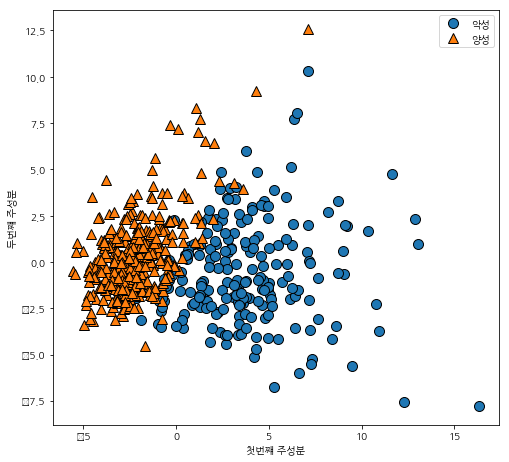

In [22]:
# 위에서 추출한 2개의 주성분을 기준으로 target 분류하기
# plot first vs. second principal component, colored by class

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['악성', '양성'], loc="best")      # cancer.target_names
plt.gca().set_aspect("equal")
plt.xlabel("첫번쨰 주성분")
plt.ylabel("두번쨰 주성분")

In [23]:
# 결과해석
# 주성분 분석은 '비지도학습'으로 오직 '상관관계'만을 고려한다
# '원본데이터'의 '어떤 방향에 대응하는 특성의 조합'으로, 구체적 어느 요소인지를 알기 어렵다
# 주성분의 내용은 components_ 속성에 저장된다 (2차원 matrix를 생성)

# print("PCA 주성분의 형태 : {}".format(pca.components_.shape))
print("PCA 주성분의 내용 :\n{}".format(pca.components_))

PCA 주성분의 내용 :
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


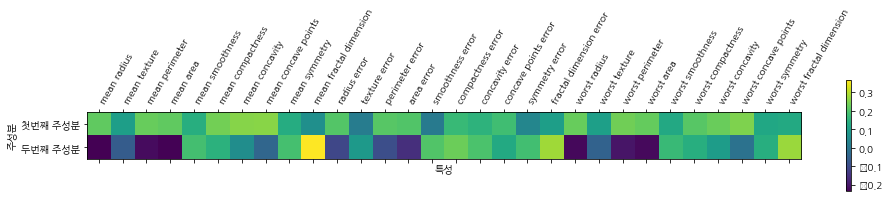

In [24]:
# 분석한 PCA 주성분 내용을 Heat Map으로 시각화

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫번째 주성분", "두번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [25]:
# 주성분 내용분석
# 첫번째 주성분은 데이터가 모두 동일하다, 이는 모든 특성들과 '양의 상관관계'를 갖는 결과값을 출력하기 때문이다
# 두번쨰 주성분은 부호가 섞여있다. 때문에 이는 첫번째 주성분과 차이를 나타내어 둘간의 의미를 설명하기가 어렵다

#### 3) <strong>고유얼굴(eigen_face)</strong> 특성 추출
원본을 축약한 정보로써 eigen_face 정보를 활용한다

이는 주로 <strong>'이미지 특성(RGB)을 추출'</strong>하는데 사용한다

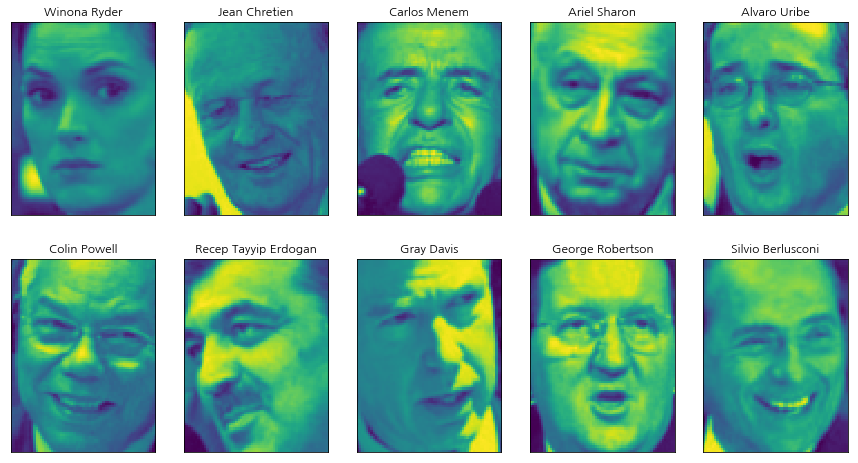

In [26]:
# Labeled Faces in the Wild 데이터셋을 활용하여, PCA 이미지 특성 추출
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [27]:
print("people.images.shape           : {}".format(people.images.shape))
print("클래스의 갯수 (Number of classes): {}".format(len(people.target_names)))

people.images.shape           : (3023, 87, 65)
클래스의 갯수 (Number of classes): 62


In [28]:
# 각 target(인물) 의 이미지 등장 간격 
# cf) bin : 유효한 데이터간의 interval

counts = np.bincount(people.target)
# target(인물)별 이름과 횟수를 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [29]:
# 인물별 사진데이터 숫자를 50개로 한정한다
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

In [30]:
# 0 ~ 255 사이의 흑백 이미지 픽셀을 0~1의 스케일로 전처리를 한다
# MinMaxScaler() 작업의 결과와 거의 동일한 값을 출력한다
X_people = X_people / 255.

In [31]:
# KNN 훈련을 통해서 이미지를 분류한다
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0) # Train/ Test로 데이터를 나눈다

knn = KNeighborsClassifier(n_neighbors=1)                  # KNN 이웃 갯수는 1개, 모델을 생성한다
knn.fit(X_train, y_train)
print("1-nn (1 최근접 이웃)의 테스트 점수: {:.2f}".format(
    knn.score(X_test, y_test)))

1-nn (1 최근접 이웃)의 테스트 점수: 0.25


In [32]:
# 결과해석
# 분석결과 0.23 ~ 0.25 를 출력한다
# 무작위 분류시 1.6% 인식률에 비해 양호하나, 서비스를 제공가능한 형태는 아니다
# 이미지의 인식률을 높이기 위하여 PCA Whiting (PCA 백색화) 옵션을 사용하여 주성분 스케일이 같도록 조정한다
# 이미지가 약간의 오차로도 별개의 이미지 인식하는 문제를 극복하기 위한 해결방법이다
# PCA Whiting은, 옵션없이 변환 후 StandardScaler를 적용하는 것과 동일한 결과를 출력한다

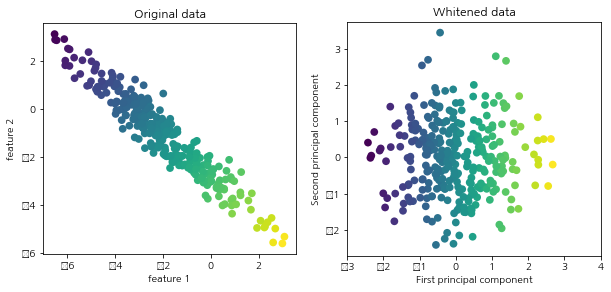

In [33]:
%matplotlib inline
from data import mglearn
mglearn.plots.plot_pca_whitening()

In [34]:
# 이미지 분석인 만큼, 100개의 주성분을 추출하여 모델을 생성한다
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print("Test 데이터 셋의 정확도 (accuracy): {:.2f}".format(knn.score(X_test_pca, y_test)))
print("pca.components_.shape: {}".format(pca.components_.shape))

Test 데이터 셋의 정확도 (accuracy): 0.31
pca.components_.shape: (100, 5655)


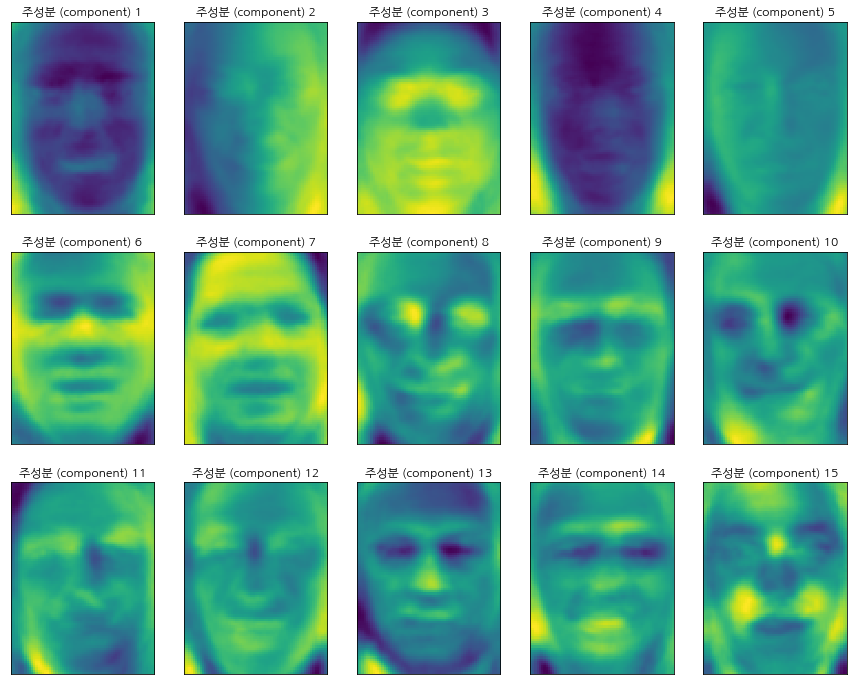

In [36]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("주성분 (component) {}".format((i + 1)))

In [37]:
# 결과해석
# 데이터를 해석하는 방식은 사람마다 상당히 다르다는 점을 우선 전제로 이해 하여야 한다
# 100개의 주성분을 관찰하여 분석한 결과, 이미지의 특징으로 어떤것을 추출하였는지를 짐작할 수 있다
# PCA 해석방법으로는 몇개의 주성분을 사용하여 원본을 재구성 하는 것이다
# 이를 통해 해당 주성분이 어느 부위 어떤 특징을 추출 한 것인지를 확인 가능하다

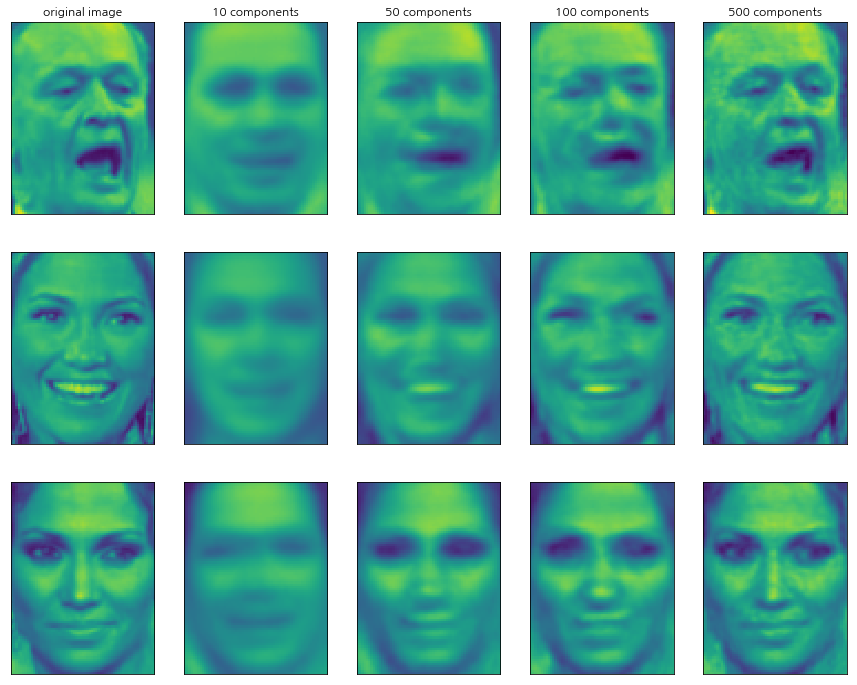

In [38]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

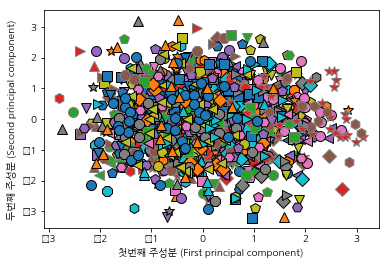

In [39]:
# 데이터 셋 분류를 2차원 평면에 점으로 표시하기
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("첫번째 주성분 (First principal component)")
plt.ylabel("두번째 주성분 (Second principal component)")

### <strong>02 비음수 행렬의 분해 (NMF)</strong> : 필드간  고유 패턴 추출 (ex)음성추출)
Non-negative Matrix Factorization은 PCA와 비슷하고, 차원 축소에서도 사용 가능하다

<strong>PCA</strong>는 <strong>분산이 크고 수직관계</strong>인 성분을 찾았다면

<strong>NMF</strong>는 <strong>음수가 아닌 성분과 계수의 값</strong>을 찾는다 (주성분과 계수가 모두 0보다 크거나 같아야 한다)

<strong>NMF는 '음성 데이터'와 같이 여러 독립된 소스들이 덮어써서 작성된 데이터</strong>에 특히 유용하다

'eigen_face'(고유얼굴) 같은 경우는 양수, 음수 데이터를 모두 갖고있지만 양수와 음수가 어떻한 규칙을 갖지는 않는다

#### <strong>1) 인위적 데이터에 NMF</strong> 적용하기
NMF는 우선적으로 데이터가 '+'(양수)인지를 확인한다 

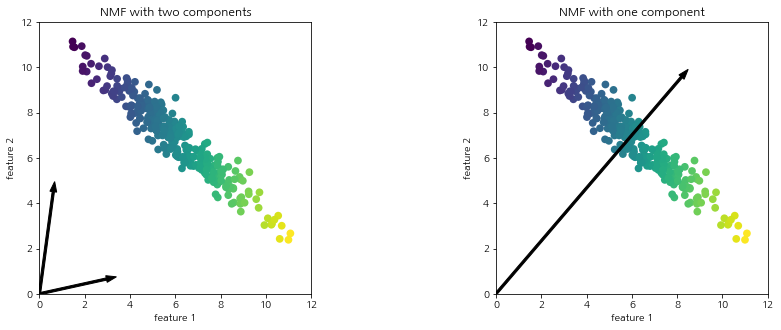

In [40]:
mglearn.plots.plot_nmf_illustration()

# 결과해석
# 왼쪽은 성분이 2인 NMF로, 데이터셋의 모든 포인트가 '+'로 이루어진 두개의 성분으로 표현 가능하다
# 오른쪽은 성분이 1개인 NMF로, 평균으로 향하는 성분을 사용한다
# PCA와 달리 성분의 갯수를 줄이면 '전체 성분'이 완전히 바뀌어 버린다
# NMF 분석은 무작위로 초기화를 하므로, '난수 생성 초기값'에 따라 결과가 달라진다 (feactor가 많아질수록 영향이 크다)

#### <strong>2) 얼굴 이미지에  NMF</strong> 적용하기
LFW 데이터 셋에 NMF를 적용하여 분석해보자

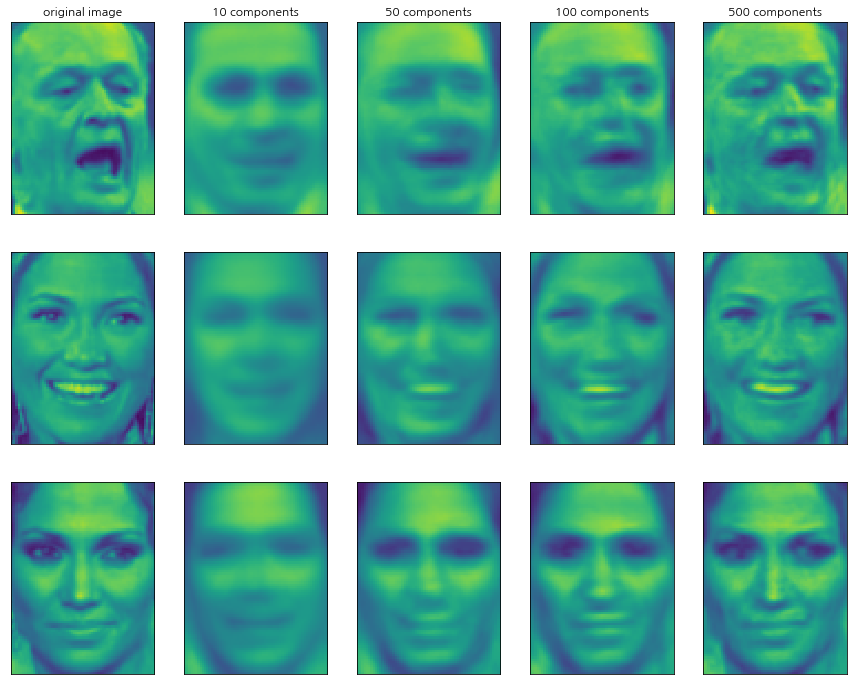

In [42]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

In [43]:
# PCA가 '데이터 재구성'에는 보다 효과적인 결과를 찾아준다
# NMF는 '데이터 유용한 패턴'을 찾는데 유용하다
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

NMF(alpha=0.0, beta=1, eta=0.1, init=None, l1_ratio=0.0, max_iter=200,
  n_components=15, nls_max_iter=2000, random_state=0, shuffle=False,
  solver='cd', sparseness=None, tol=0.0001, verbose=0)

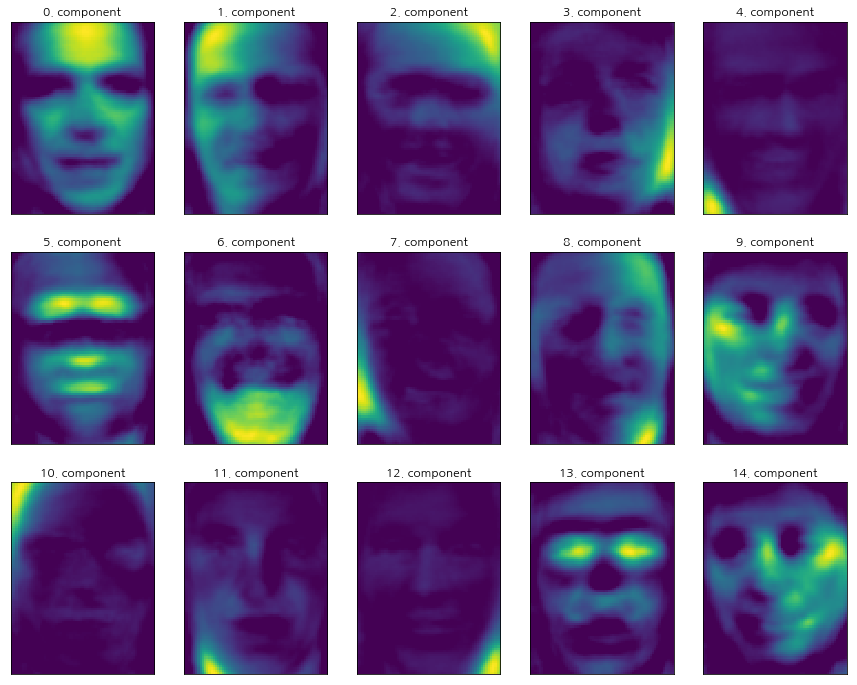

In [44]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

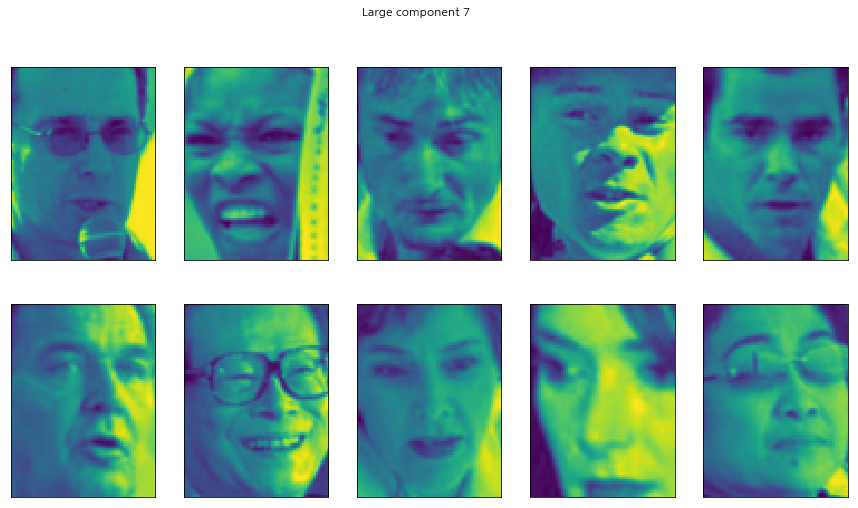

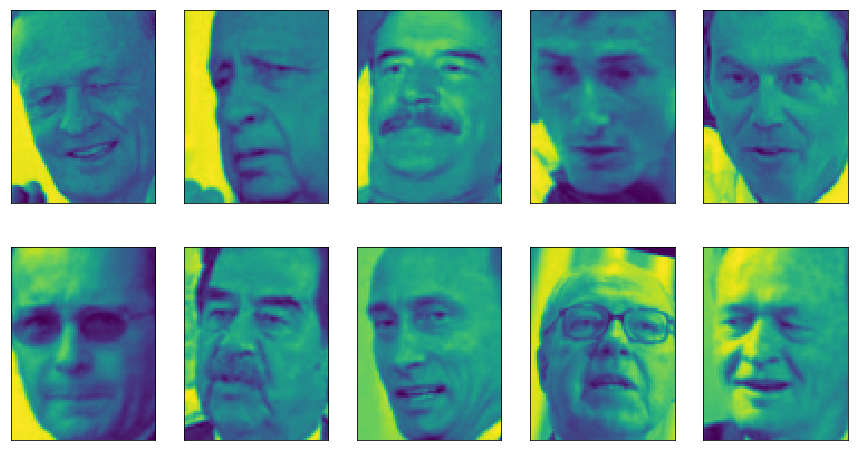

In [45]:
# NMF 분석결과 중 
# 각각의 성분의 특성을 분석하기 (3번쨰 7번째 성분으로 이미지를 분석)
X_train_nmf = nmf.transform(X_train)
X_test_nmf  = nmf.transform(X_test)

compn = 3 # 3번쨰 성분으로 정렬 후, 처음 10개의 이미지를 출력한다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 7 # 7번쨰 성분으로 정렬 후, 처음 10개의 이미지를 출력한다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

In [46]:
# 결과해석
# 성분 7 이미지는 왼쪽으로 돌아가 있고, 11번쨰 이미지부터 오른쪾으로 돌아가 있다
# 이와 같이 패턴추출하는데 NMF가 유용한 결과를 출력한다

#### <strong>3) 인위적인 3개의 신호데이터에  NMF</strong> 적용하기
패턴 분석에 어떤결과를 나타내는지 관찰해보자

(2000, 3)

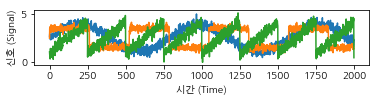

In [47]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')

plt.xlabel("시간 (Time)")
plt.ylabel("신호 (Signal)")
S.shape

In [48]:
# S 원본데이터를 사용하여 100개의 측정 데이터를 생성
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)

print("측정 데이터 형태 : {}".format(X.shape))

측정 데이터 형태 : (2000, 100)


In [49]:
# nmf를 사용하여 3개의 신호를 복원한다
from sklearn.decomposition import NMF
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)

print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [50]:
# PCA 방법을 사용하여 신호를 복원한다
pca = PCA(n_components=3)
H = pca.fit_transform(X)

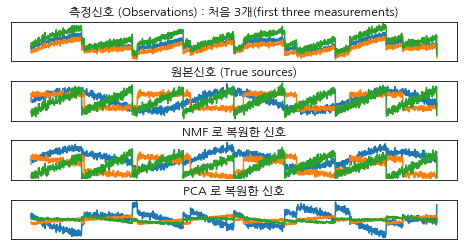

In [51]:
# NMF 와 PCA를 신호분석을 비교하여 출력
models = [X, S, S_, H]
names = ['측정신호 (Observations) : 처음 3개(first three measurements)',
         '원본신호 (True sources)',
         'NMF 로 복원한 신호',
         'PCA 로 복원한 신호']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

In [52]:
# 결과해석
# NMF는 개별 속성을 잘 복원하여 구별하였지만 (병렬적 데이터 인식에 탁월)
# PCA는 첫 주성분 속성을 기준으로 복원하여, 패턴의 복원에 실패 하였다 (직렬적 데이터 인식)
# 패천추출
# 관련하여 독립성분분석(ICA), 요인분석(FA), 희소코딩(Sparse Coding)-딕셔너리 학습 을 참고하면 된다

### <strong>03 t-SNE를 이용한 매니폴드 학습</strong> (manifold :다양체)
PCA 분석이 데이터 변환시 2차원 산점도 표현에 유용하여 많이 쓰이지만

알고리즘 특성상 적용범위가 한정되는 단점이 있다

<strong>보다 복잡한 매핑</strong>을 통한 시각화를 위해서는 <strong>t-SNE</strong> 알고리즘을 많이 사용한다

<strong>매니폴드 학습 (manifold learning)</strong> 알고리즘 목적이 '시각화'이기 때문에 3개 이상 특성을 뽑는 경우는 드물다

t-SNE를 포함한 일부 알고리즘들은, 훈련 데이터에 바로 적용만 가능하고, 다른 데이터에는 별도의 학습을 요한다

#### <strong>1) 숫자를 PCA</strong>로 분류하기
비교를 위한 PCA 분류 Test

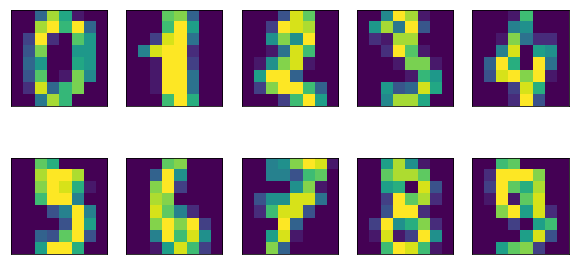

In [53]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

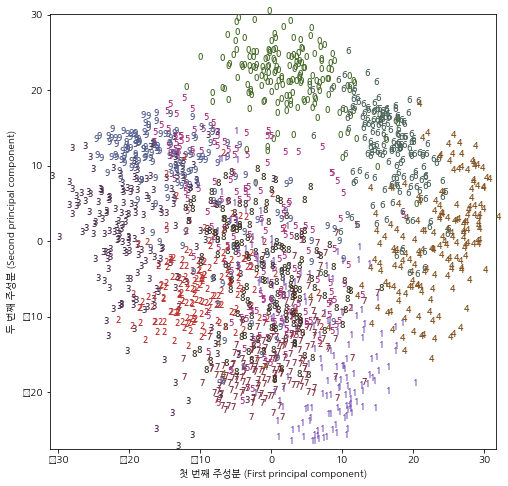

In [54]:
# PCA 모델을 생성한다
# 분산이 큰 2개의 주성분을 활용하여 데이터를 분류한다
pca = PCA(n_components=2)
pca.fit(digits.data)

# 처음 두개의 주성분으로 숫자 데이터를 변환한다
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(8, 8))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    # plt.text(x, y, string) : 숫자 텍스트를 이용하여 산점도를 시각화
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("첫 번째 주성분 (First  principal component)")
plt.ylabel("두 번째 주성분 (Second principal component)")

# 결과해석
# 0, 6, 4는 분류가 잘 된 것으로 보이지만, 대부분의 숫자는 겹치는 영역이 많은 것이 관찰된다

#### <strong>2) 숫자를 t-SNE</strong>로 분류하기
t-SNE는 새로운 데이터로 변환하는 기능이 제공되지 않아, .transform 메서드가 없다

대신에 모델을 만들자 마자 데이터를 변환하는 fit_transform 메서드를 사용한다

In [56]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

# TSNE 에서는 .transform 대신에 .fit_transform 메서드로 변환한다
digits_tsne = tsne.fit_transform(digits.data)

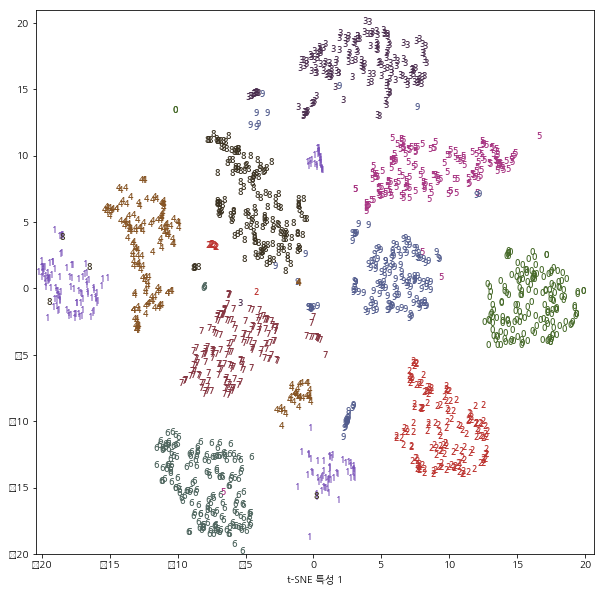

In [57]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE 특성 0"); plt.xlabel("t-SNE 특성 1")

In [58]:
# 결과해석
# 클래스의 정보를 전혀 사용하지 않은, 비지도학습 방식의 분류 알고리즘으로
# 각자 고유한 pattern을 갖는 데이터의 경우, PCA에 비해 훨씬 뛰어난 분류결과를 나타낸다
# t-SNE는 매개변수를 약간 조정해야 하지만, 기본값 만으로도 잘 작동하는 경우가 많다

<br></br>
## 4 군집
Clustering 은 데이터셋을 Cluster 라는 그룹으로 나누는 작업이다
### 01 <strong>K-평균</strong> 군집
K-mean clustering : 영역을 대표하는 <strong>클러스터 중심(cluster Center)</strong>을 찾는다

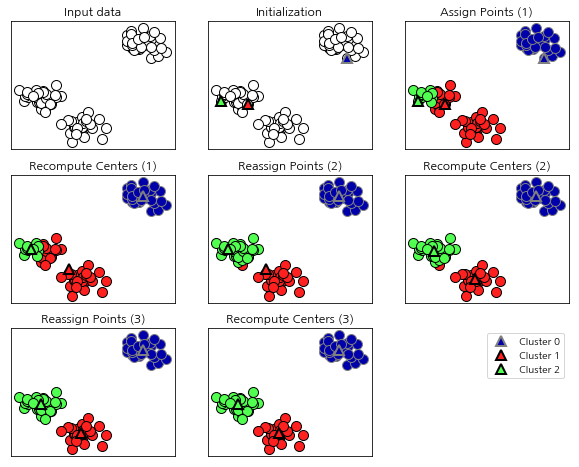

In [59]:
mglearn.plots.plot_kmeans_algorithm()

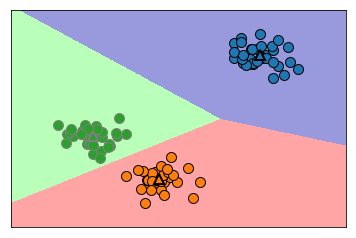

In [61]:
# 결과해석
# 삼각형 : 각 클러스터의 중심을 나타낸다.
# 초기에는 임의의 삼각형 3개의 점을 찾는다
# 이후 k-mean 거리측정 알고리즘을 반복하면서 중심의 위치를 갱신한다
# 반복 후에도 '포인트의 변화'가 없는 경우에는 알고리즘을 멈춘다

mglearn.plots.plot_kmeans_boundaries()

In [81]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 임의의 2차원 데이터를 생성
X, y = make_blobs(random_state=1)

# 군집 모델을 생성한다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print("클러스터 레이블 :\n{}".format(kmeans.labels_))
print("\nK-means 예측 레이블 :\n{}".format(kmeans.predict(X)))

클러스터 레이블 :
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]

K-means 예측 레이블 :
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [ ]:
# 결과해석
# 임의의 레이블을 지정할 뿐, 그 자체적인 의미를 갖지는 않는다
# 난수 생성되므로 클러스터 숫자는 반복실행시 다른 숫자로 출력 가능하다

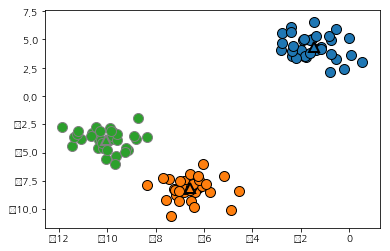

In [82]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

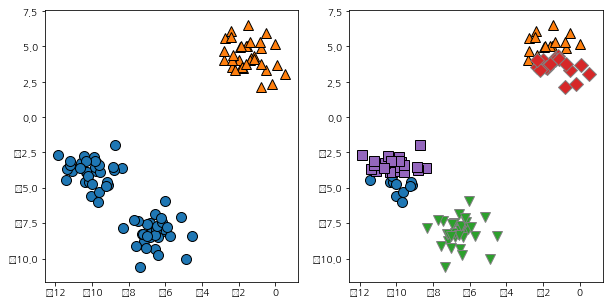

In [83]:
# 클러스터 갯수를 변경시 출력내용 비교
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

kmeans = KMeans(n_clusters=2) # 두 개의 클러스터 중심을 사용한다
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5) # 5개의 클러스터 중심을 사용한다
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

### 02 <strong>K-평균</strong> 군집이 부적절한 경우
<strong>클러스터 중심(cluster Center)</strong>으로 부터 같은 거리의 영역으로만 분류를 한다

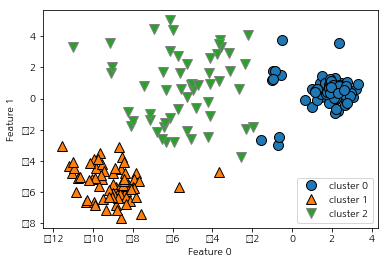

In [84]:
# K-means 알고리즘이 부적절한 경우
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# K-means 클러스터를 '반경이 동일한 영역'으로만 구별을 한다
# 떄문에 각기 밀도(영역의 크기)가 다른 경우에는 클러스터 번호가 다르게 출력된다

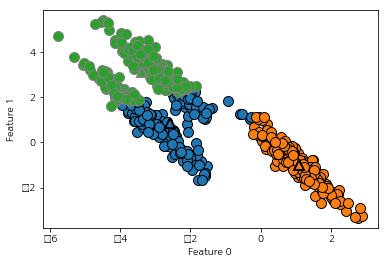

In [85]:
X, y = make_blobs(random_state=170, n_samples=600) # 무작위 데이터 생성
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2)) # 길게 늘어진 형태로 변환한다
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3) # 3개의 클러스터로 k-mean분류을 한다
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Cluster를 할당하고, 중심을 표시한다
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# K-mean는 모든 방향에서 데이터의 성격이 같다고 판단을 함으로써
# 중심거리만 고려하기 때문에, 원형 분류가 아닌 다른 분류에는 부적합한 결과를 출력한다

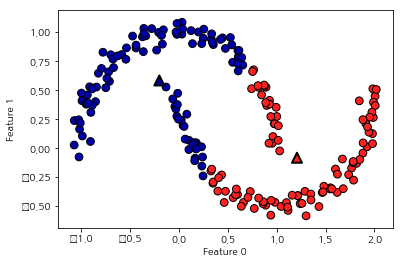

In [86]:
# two_moons 데이터를 생성한다 (약간의 노이즈를 첨가한다)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)  # 2개의 cluster 로 k-means 분류를 한다
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 시각화 한다
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 03 <strong>벡터 양자화</strong> 또는 <strong>분해 매서드</strong>로써 K-means
<strong>클러스터 중심(cluster Center)</strong>으로 부터 같은 거리의 영역으로만 분류를 한다

<strong>벡터의 양자화</strong> : 고유벡터들을 유사한 속성끼리 연결한다 (http://gorakgarak.tistory.com/481)

In [ ]:
# PCA, NMF, K-means 알고리즘으로 분석한 결과 값 비교하기
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

In [87]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

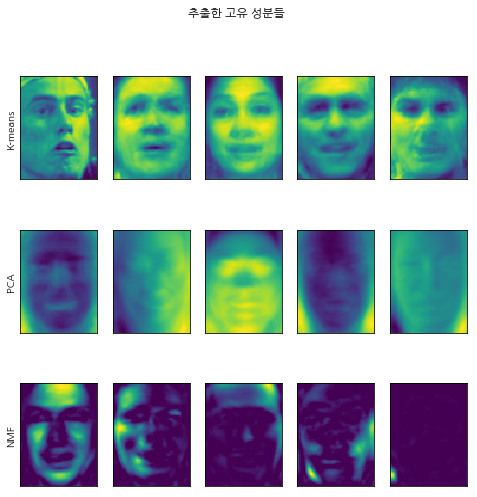

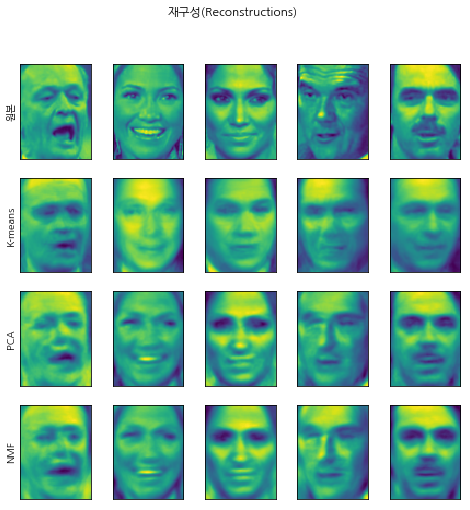

In [91]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("추출한 고유 성분들")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("K-means")
axes[1, 0].set_ylabel("PCA")
axes[2, 0].set_ylabel("NMF")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("재구성(Reconstructions)")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("원본")
axes[1, 0].set_ylabel("K-means")
axes[2, 0].set_ylabel("PCA")
axes[3, 0].set_ylabel("NMF")

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


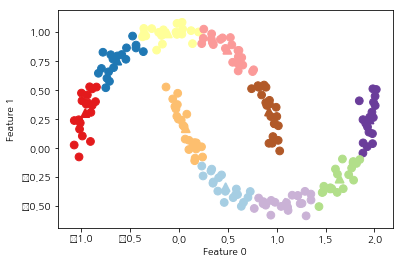

In [92]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("특성 0 (Feature 0)")
plt.ylabel("특성 1 (Feature 1)")
print("클러스터 레이블 (Cluster memberships) :\n{}".format(y_pred))
# n_clusters=10 으로 설정하여, 0 ~ 10의 숫자를 출력한다

In [98]:
distance_features = kmeans.transform(X)
print("클러스터 거리 데이터 형태 (Distance feature shape) : \n{}".format(distance_features.shape))
print("\n클러스터 거리 (Distance features) : len(distance_features) :{}\n{}".
      format(len(distance_features),distance_features))

클러스터 거리 데이터 형태 (Distance feature shape) : 
(200, 10)

클러스터 거리 (Distance features) : len(distance_features) :200
[[ 0.9220768   1.46553151  1.13956805 ...,  1.16559918  1.03852189
   0.23340263]
 [ 1.14159679  2.51721597  0.1199124  ...,  0.70700803  2.20414144
   0.98271691]
 [ 0.78786246  0.77354687  1.74914157 ...,  1.97061341  0.71561277
   0.94399739]
 ..., 
 [ 0.44639122  1.10631579  1.48991975 ...,  1.79125448  1.03195812
   0.81205971]
 [ 1.38951924  0.79790385  1.98056306 ...,  1.97788956  0.23892095
   1.05774337]
 [ 1.14920754  2.4536383   0.04506731 ...,  0.57163262  2.11331394
   0.88166689]]


<br></br>
## 5 병합 군집
<strong>병합군집 (agglomerative clustering)</strong> : 

한개의 알고리즘으로 클러스터를 지정후, 종료조건 만족시까지 가장 비슷한 두개의 클러스터를 합쳐 나아간다

<strong>매개변수 : 클러스터 갯수</strong>로, 조건 충족시까지 비슷한 두개의 클러스터를 합쳐 나아간다

scikit-learn 구현된 옵션들
1. ward link(default) : 클러스터 내 <strong>분산을 최소로 증가</strong>시키는 두개의 클러스터를 합친다
2. average : 클러스터 포인트 사이의 <strong>평균거리가 가장 짧은</strong> 두개의 클러스터를 합친다
3. complete(최대연결) : 클러스터 <strong>포인트 거리가 가장 짧은</strong> 두개의 클러스터를 합친다

### 01 <strong>K-평균</strong> 군집이 부적절한 경우
<strong>클러스터 중심(cluster Center)</strong>으로 부터 같은 거리의 영역으로만 분류를 한다

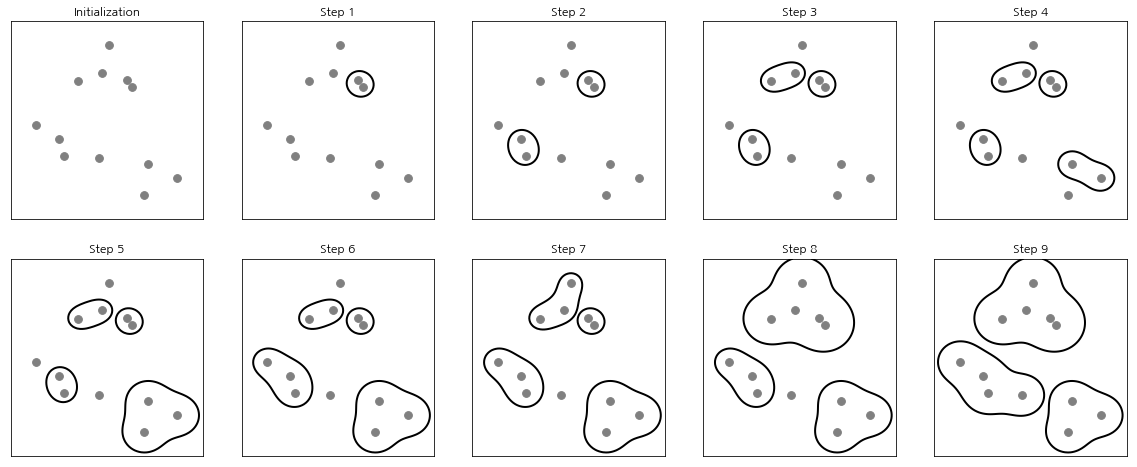

In [99]:
mglearn.plots.plot_agglomerative_algorithm()

# 개별 클러스터를 포인트로 출력, 이들이 병합되는 과정을 시각화 하였다
# 병합군집은 군집끼지 묶는 작업으로 , 개별 데이터에 대한 예측은 할 수 없다
# .predict() 메서드는 없는 대신
# 훈련 뒤 클러스터 소속 정보를 얻기위한 fit_predict() 메서드를 사용한다

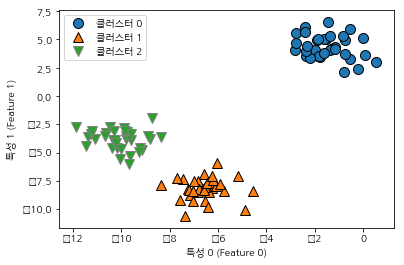

In [100]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성 0 (Feature 0)")
plt.ylabel("특성 1 (Feature 1)")

### 02 계층적 군집(hierarchical clustering) 과 덴드로-그램
병합군집 결과, <strong>계층적 군집(hierarchical clustering)</strong>을 생성한다.

하지만 이는 2차원 데이터만 가능한 한계가 존재한다

<strong>덴드로그램(dendro-gram)</strong>의 경우는 다차원 데이터셋을 처리 가능하다

하지만 sklearn에서 기본제공을 하지 않아, <strong>SciPy의 배열 데이터</strong>를 이어받으면 생성 가능하다

In [105]:
# SciPy에서 ward 군집 함수와, 덴드로그램 함수를 불러온다
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
linkage_array = ward(X)   # 데이터 배열 X에, ward 함수를 적용한다

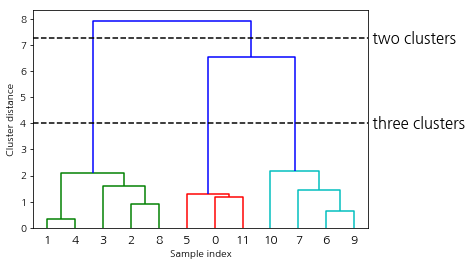

In [106]:
# ward 결합된 데이터를 사용해, 덴드로그램을 그린다
dendrogram(linkage_array) 

# 2개와 3개를 구분하는 '구분선'을 표시한다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("샘플 인덱스 (Sample index)")
plt.ylabel("클러스터 거리 (Cluster distance)")

In [ ]:
# 덴드로 그램은 각 포인트 간의 클러스터를 합치면서 생성한다
# Y 축은 클러스터 결합거리로, 합쳐진 클러스터가 얼마나 멀리 떨어져 있는지를 보여준다
# 11 -> 3개 클러스터 결합은 멀지만, 3 -> 2개 클러스터 결합은 가까운 것을 알 수 있다
# 이와같은 알고리즘도 'two_moons'와 같은 데이터 셋은 구분하지 못한다

### 03 DBSCAN
Density-based spatial clustering of applications with noise

이 알고리즘은 클러스터 갯수를 미리 지정하지 않아도, 복잡한 모델의 포인트를 구분 가능하다

병합군집, K-means 보다 다소 느리지만, 큰 데이터셋에도 적용이 가능한 알고리즘이다
1. 특성 공간에서 가까이 있는 데이터가 많아, <strong>붐비는 지역 포인트(밀집지역(dense region))</strong>를 찾는다
2. <strong>밀집지역</strong>이 클러스터가 되고, 비교적 <strong>비어있는 지역</strong>은 경계로 구분한다

<strong>매개변수</strong>로는 <strong>min_sample, eps</strong>가 있다
1. 한개의 데이터 포인트에서 <strong>eps 거리</strong>안에, <strong>min_sample 갯수</strong>만큼 데이터가 있으면 핵심샘플로 분류한다
2. 시작할 때 무작위로 포인트 하나를 선택한다
3. 포인트 eps 거리안에 <strong>min_sample 보다 작은 포인트</strong>가 있으면 :  해당 포인트를 <strong>잡음(noise) 레이블</strong>로 지정
4. 포인트 eps 거리안에 <strong>min_sample 보다 많은 포인트</strong>가 있으면 :  해당 포인트를 <strong>핵심샘플로 레이블</strong>로 지정
5. 4.에서 핵심 포인트 주변의 모든 이웃과 비교하여 병합을 한다 (할당 클러스트가 없는경우, 직전의 클러스터 레이블을 할당한다)
6. 이를반복하여 <strong>eps 거리안에, 핵심샘플이 없을 때 까지</strong> 반복해서 성장을 한다
7. 모든 포인트 들은 <strong>핵심포인트, 경계포인트, 잡음포인트</strong>로 구분을 한다

In [102]:
# DBSCAN 도 새로운 데이터를 예측하는 알고리즘이 나이므로 
# .fit_predict()를 사용하여 레이블을 계산한다
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


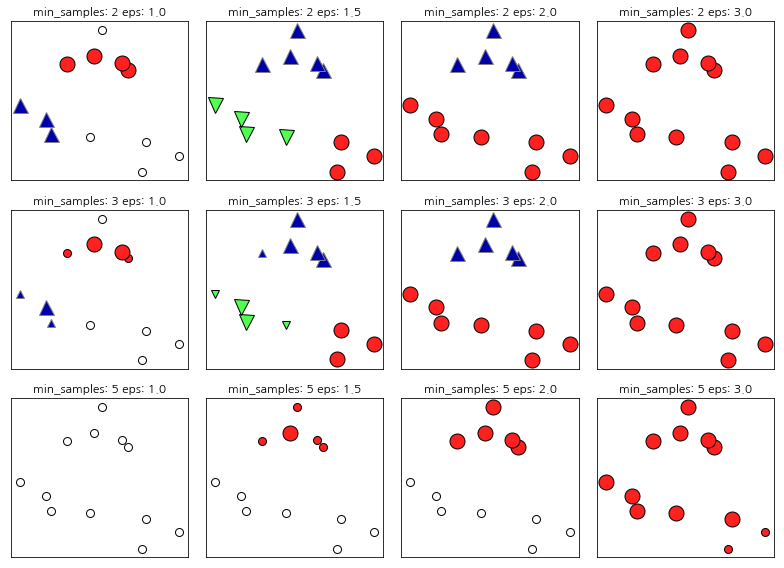

In [108]:
mglearn.plots.plot_dbscan()

# 클러스트에 해당 포인트는 색을 칠하고, 잡음 포인트는 하얀색으로 남겨두었다
# 핵심샘플은 크게표시, 경계포인트는 작게 표현
# eps를 증가하면 (왼쪽 --> 오른쪽): 하나의 클러스터에 많은 포인트가 묶인다 
# min_sample를 증가하면 (위 --> 아래): 핵심 포인트의 수는 줄고, 잡음 포인트가 늘어난다 